In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
import pandas as pd
import numpy as np

# Augmenter le nombre de produits pour assurer assez de données
num_products = 1000

# Générer des noms de produits fictifs
product_names = [f"Product {i}" for i in range(1, num_products + 1)]

# Générer des notes clients réalistes entre 1 et 5
customer_ratings = np.random.uniform(1, 5, size=num_products).round(1)

# Créer le DataFrame
df_customer_rating = pd.DataFrame({"Product Name": product_names, "Customer Rating": customer_ratings})

# Sauvegarder le fichier localement
df_customer_rating.to_csv("customer_ratings_large.csv", index=False)

# Télécharger le fichier
print("Fichier enregistré dans le répertoire courant.")

Fichier enregistré dans le répertoire courant.


In [80]:
# Charger les données
df = pd.read_csv("popular_electronics_prices_extended.csv")
df_ratings = pd.read_csv("customer_ratings_large.csv")

In [83]:
# Vérifier combien de lignes ont une correspondance après la fusion
df = df.merge(df_ratings, on="Product Name", how="left", suffixes=('', '_customer'))  # Changed suffixes
print(f"Nombre de lignes après fusion : {len(df)}")
print(f"Lignes avec 'Customer Rating' avant remplissage : {df['Customer Rating'].count()}")
# Convertir les colonnes numériques correctement
df["Customer Rating"] = pd.to_numeric(df["Customer Rating"], errors='coerce')
df["Average Price 2020"] = pd.to_numeric(df["Average Price 2020"], errors='coerce')

# Vérifier les valeurs NaN après conversion
print(f"Valeurs manquantes 'Customer Rating' : {df['Customer Rating'].isna().sum()}")
print(f"Valeurs manquantes 'Average Price 2020' : {df['Average Price 2020'].isna().sum()}")

# Remplacer les valeurs manquantes avec des valeurs plausibles
df = df.copy()
df.loc[:, "Customer Rating"] = df["Customer Rating"].fillna(np.random.uniform(2.5, 4.5))

# Calculate a single random value within the range
random_price = np.random.uniform(df["Average Price 2020"].min(), df["Average Price 2020"].max())
df.loc[:, "Average Price 2020"] = df["Average Price 2020"].fillna(random_price)

# Vérifier les valeurs après correction

print(f"Lignes avec 'Customer Rating' après remplissage : {df['Customer Rating'].count()}")
print(f"Lignes avec 'Average Price 2020' après remplissage : {df['Average Price 2020'].count()}")

Nombre de lignes après fusion : 1020
Lignes avec 'Customer Rating' avant remplissage : 0
Valeurs manquantes 'Customer Rating' : 1020
Valeurs manquantes 'Average Price 2020' : 404
Lignes avec 'Customer Rating' après remplissage : 1020
Lignes avec 'Average Price 2020' après remplissage : 1020


In [84]:
# Affichage des premières lignes
display(df.head())

,Product Name,Category,Brand,Release Year,Average Price 2015,Average Price 2020,Average Price 2025,Customer Rating,Customer Rating_customer
0,iPhone 6,Smartphone,Apple,2014,649.0,1283.817084,Discontinued,3.222721,NaN
1,iPhone 12,Smartphone,Apple,2020,NaN,799.000000,599,3.222721,NaN
2,Galaxy S6,Smartphone,Samsung,2015,699.0,1283.817084,Discontinued,3.222721,NaN
3,Galaxy S20,Smartphone,Samsung,2020,NaN,999.000000,749,3.222721,NaN
4,MacBook Air (2015),Laptop,Apple,2015,999.0,799.000000,Discontinued,3.222721,NaN


In [ ]:
# Identifier la plateforme avec les meilleurs prix
df["Best Platform"] = df.iloc[:, 5:].idxmin(axis=1)
best_platform_count = df["Best Platform"].value_counts()
fig3 = px.bar(best_platform_count, x=best_platform_count.index, y=best_platform_count.values,
              title="Nombre de fois où une plateforme offre le meilleur prix")
fig3.show()

In [2]:
# Import the dataset
data = pd.read_csv('popular_electronics_prices_extended.csv')

# Initial exploration of data
initial_inspection = data.head()

In [3]:
initial_inspection

,Product Name,Category,Brand,Release Year,Average Price 2015,Average Price 2020,Average Price 2025
0,iPhone 6,Smartphone,Apple,2014,649.0,Discontinued,Discontinued
1,iPhone 12,Smartphone,Apple,2020,NaN,799,599
2,Galaxy S6,Smartphone,Samsung,2015,699.0,Discontinued,Discontinued
3,Galaxy S20,Smartphone,Samsung,2020,NaN,999,749
4,MacBook Air (2015),Laptop,Apple,2015,999.0,799,Discontinued


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product Name        1020 non-null   object 
 1   Category            1020 non-null   object 
 2   Brand               1020 non-null   object 
 3   Release Year        1020 non-null   int64  
 4   Average Price 2015  123 non-null    float64
 5   Average Price 2020  622 non-null    object 
 6   Average Price 2025  1020 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 55.9+ KB


In [14]:
print(data.describe())

       Release Year  Average Price 2015  Average Price 2020  \
count   1020.000000         1020.000000         1020.000000   
mean    2019.387255         1655.964706         1073.937647   
std        2.941036          300.563280          476.929958   
min     2013.000000           35.000000           38.500000   
25%     2017.000000         1666.000000          872.200000   
50%     2019.000000         1666.000000         1066.100000   
75%     2022.000000         1666.000000         1248.450000   
max     2024.000000         2994.000000         2095.800000   

       Average Price 2025  
count         1020.000000  
mean           780.732843  
std            428.780870  
min             27.000000  
25%            411.875000  
50%            781.500000  
75%           1161.000000  
max           1500.000000  


In [16]:

# Vérifier les valeurs manquantes dans chaque colonne
print(data.isnull().sum())

Product Name          0
Category              0
Brand                 0
Release Year          0
Average Price 2015    0
Average Price 2020    0
Average Price 2025    0
dtype: int64


In [48]:
# Liste des colonnes numériques que tu veux convertir
columns_to_convert = ['Average Price 2015', 'Average Price 2020', 'Average Price 2025']

# Pour chaque colonne dans la liste, convertir en numérique et remplir les NaN avec la médiane
for col in columns_to_convert:
    # Convertir la colonne en numérique, remplacer les erreurs par NaN
    data[col] = pd.to_numeric(data[col], errors='coerce')
    
    # Remplir les NaN avec la médiane de la colonne
    data[col].fillna(data[col].median(), inplace=True)

# Afficher le DataFrame après modification
print(data)


                            Product Name          Category    Brand  \
0                               iPhone 6        Smartphone    Apple   
1                              iPhone 12        Smartphone    Apple   
2                              Galaxy S6        Smartphone  Samsung   
3                             Galaxy S20        Smartphone  Samsung   
4                     MacBook Air (2015)            Laptop    Apple   
...                                  ...               ...      ...   
1015             HP Headphones Model 357  Streaming Device       HP   
1016           Oura Headphones Model 331   Fitness Tracker     Oura   
1017           Acer Smartwatch Model 810        Smartphone     Acer   
1018     Fitbit Gaming Console Model 102        Smartwatch   Fitbit   
1019  Samsung Streaming Device Model 365            Tablet  Samsung   

      Release Year  Average Price 2015  Average Price 2020  Average Price 2025  
0             2014               649.0              1066.1        

In [49]:
# Imputing missing values based on data distribution, data type, and relevance
# For numerical columns
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)
# For categorical columns
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)
    

In [50]:
data.head()

,Product Name,Category,Brand,Release Year,Average Price 2015,Average Price 2020,Average Price 2025
0,iPhone 6,Smartphone,Apple,2014,649.0,1066.1,781.5
1,iPhone 12,Smartphone,Apple,2020,1666.0,799.0,599.0
2,Galaxy S6,Smartphone,Samsung,2015,699.0,1066.1,781.5
3,Galaxy S20,Smartphone,Samsung,2020,1666.0,999.0,749.0
4,MacBook Air (2015),Laptop,Apple,2015,999.0,799.0,781.5


In [51]:
print(data['Average Price 2020'].unique())

[1066.1  799.   999.  1199.    99.   299.   499.   179.    50.  1290.8
 1581.3 1338.4 1204.    82.6  950.6  577.5 1894.9  161.7 1907.5  389.9
  354.9 1381.1  441.  2084.6 1831.9  837.2  620.9  470.4  253.4 1695.4
  116.2  315.7  799.4  583.8  406.  1312.5  366.8 1058.4 1636.6 1206.1
 1586.9  623.7 1712.2 1747.9 1918.7 1081.5  105.7  122.5 1251.6 1019.9
  270.9  218.4  329.   618.1  561.4  361.2 1428.7  267.4 1134.7  478.8
  966.   798.7 1901.9  945.  1687.7 1064.  1659.  2062.9  168.7 1351.
 1827.7  550.9 1323.  1137.5  780.5 1843.1   73.5   70.7 1967.7  637.
 1344.  2069.9 1269.1  258.3 1377.6 1810.2   92.4 1086.4  102.9   93.1
 2004.8 1672.3 1954.4 1768.2  672.    60.9  737.8 1279.6  777.   746.9
 1985.2  639.8  934.5 1679.3 1075.2 1145.9  693.  1684.9 2046.8  647.5
 1342.6  269.5  695.1 1775.9 1597.4  750.4 1280.3  445.2  812.  1577.1
  675.5 1599.5 1346.8  285.6 1689.1 1168.3 1125.6  228.2  652.4 1752.8
 1133.3  388.5 1903.3  731.5  829.5  928.2  597.1 1236.2 1309.7  881.3
 1106.  

In [52]:
detailed_summary = data.describe(include='all')
detailed_summary

,Product Name,Category,Brand,Release Year,Average Price 2015,Average Price 2020,Average Price 2025
count,1020,1020,1020,1020.000000,1020.000000,1020.000000,1020.000000
unique,1017,11,20,NaN,NaN,NaN,NaN
top,Sony Tablet Model 556,Smartwatch,HP,NaN,NaN,NaN,NaN
freq,2,114,68,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2019.387255,1655.964706,1073.937647,780.732843
std,NaN,NaN,NaN,2.941036,300.563280,476.929958,428.780870
min,NaN,NaN,NaN,2013.000000,35.000000,38.500000,27.000000
25%,NaN,NaN,NaN,2017.000000,1666.000000,872.200000,411.875000
50%,NaN,NaN,NaN,2019.000000,1666.000000,1066.100000,781.500000
75%,NaN,NaN,NaN,2022.000000,1666.000000,1248.450000,1161.000000


In [53]:
# Calcul de la corrélation entre les colonnes numériques
#data['Average Price 20# Nettoyer la colonne 'Average Price 2020' (si nécessaire) en supprimant des valeurs non numériques
data['Average Price 2020'] = data['Average Price 2020'].replace({'\$': '', ',': '', 'iPhone 6': ''}, regex=True)

# Convertir la colonne en numérique, en remplaçant les erreurs par NaN
data['Average Price 2020'] = pd.to_numeric(data['Average Price 2020'], errors='coerce')

# Remplir les valeurs manquantes avec la médiane
data['Average Price 2020'].fillna(data['Average Price 2020'].median(), inplace=True)


In [56]:

correlation_matrix = data.corr()

# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()

ValueError: could not convert string to float: 'iPhone 6'

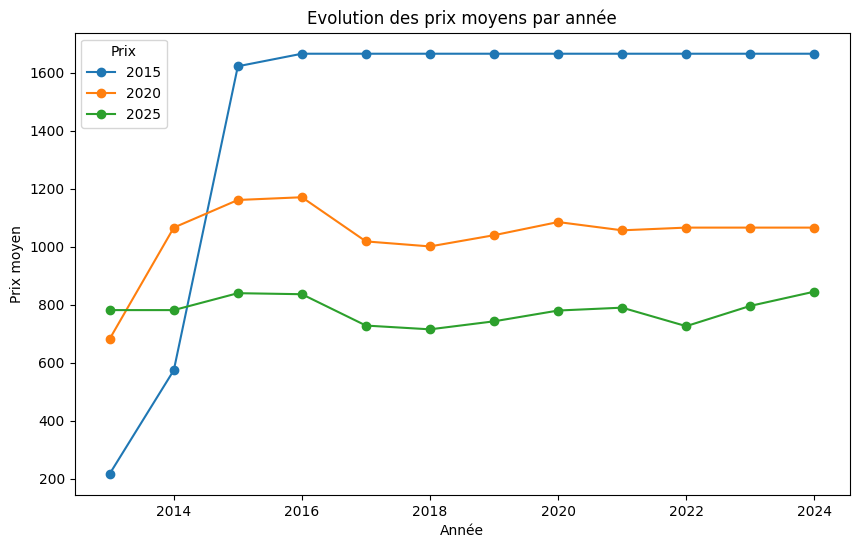

In [58]:
# Groupement des données par année de sortie et calcul de la moyenne des prix
price_by_year = data.groupby('Release Year')[['Average Price 2015', 'Average Price 2020', 'Average Price 2025']].mean()

# Visualisation des tendances des prix dans le temps
price_by_year.plot(figsize=(10, 6), marker='o', linestyle='-')
plt.title('Evolution des prix moyens par année')
plt.xlabel('Année')
plt.ylabel('Prix moyen')
plt.legend(title='Prix', labels=['2015', '2020', '2025'])
plt.show()

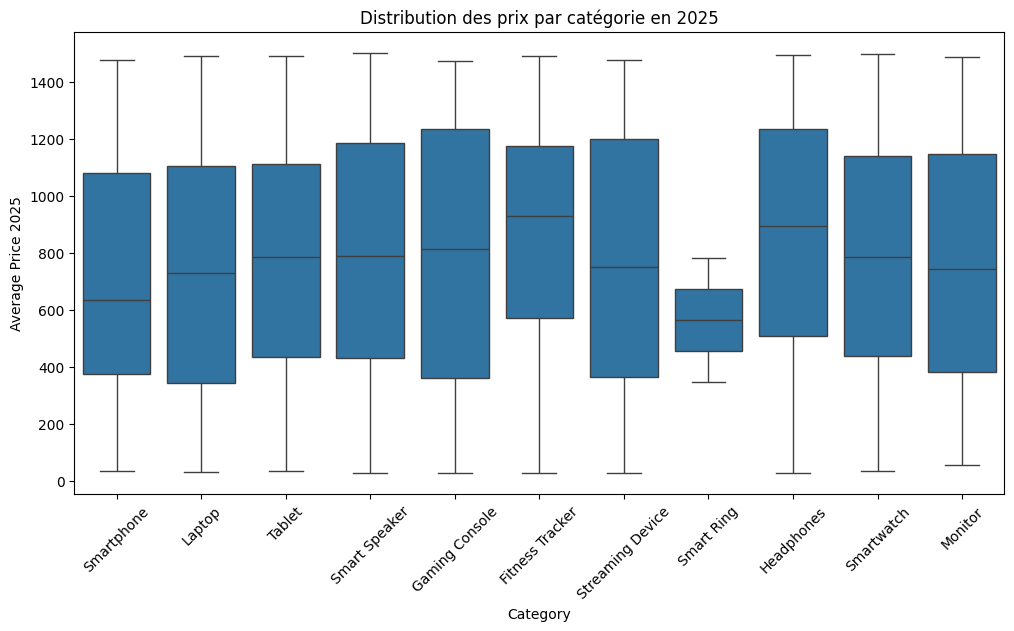

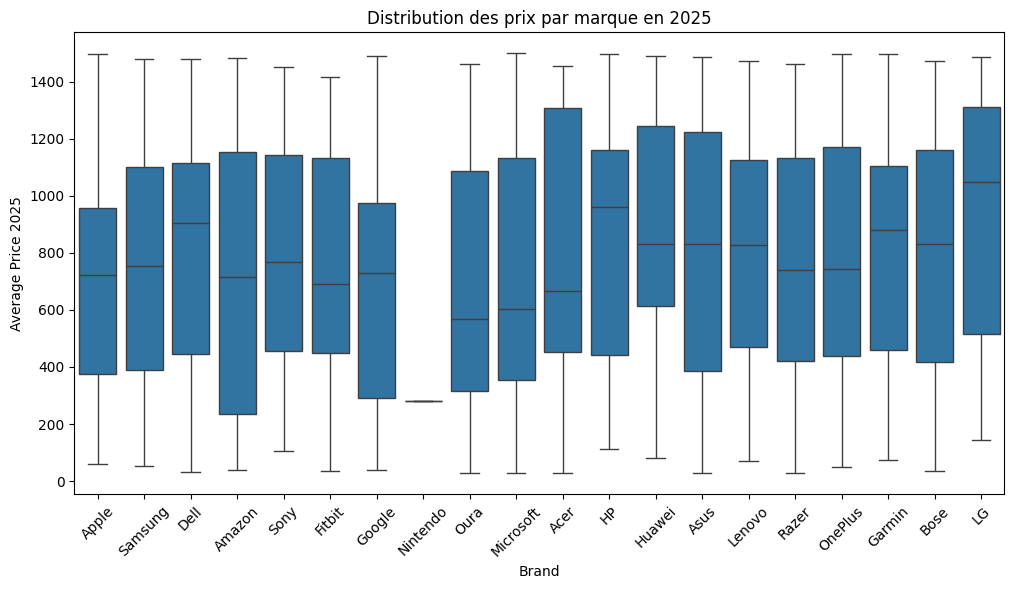

In [ ]:
# Boxplot des prix par catégorie 2025
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Average Price 2025', data=data)
plt.xticks(rotation=45)
plt.title('Distribution des prix par catégorie en 2025')
plt.show()

# Boxplot des prix par marque 2025
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Average Price 2025', data=data)
plt.xticks(rotation=45)
plt.title('Distribution des prix par marque en 2025')
plt.show()

In [ ]:
#Histogramme des prix moyens en 2020
import plotly.express as px

fig = px.histogram(data, x='Average Price 2020', nbins=20, title="Répartition des prix moyens en 2020")
fig.show()

In [ ]:
# Boxplot des prix moyens par catégorie
fig = px.box(data, x='Category', y='Average Price 2020', title="Distribution des prix par catégorie de produit")
fig.show()

In [63]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\DELL 3510\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


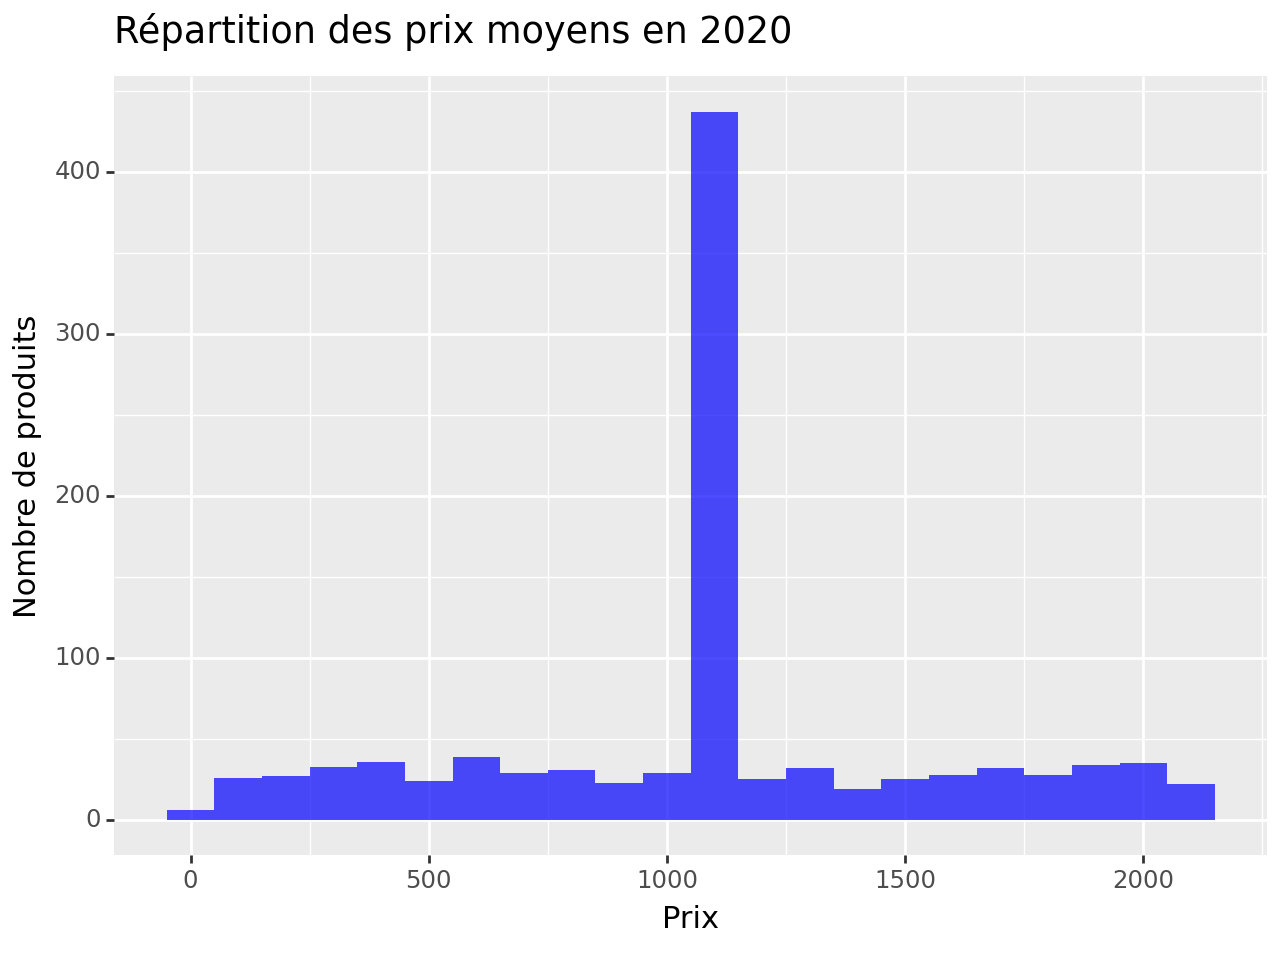

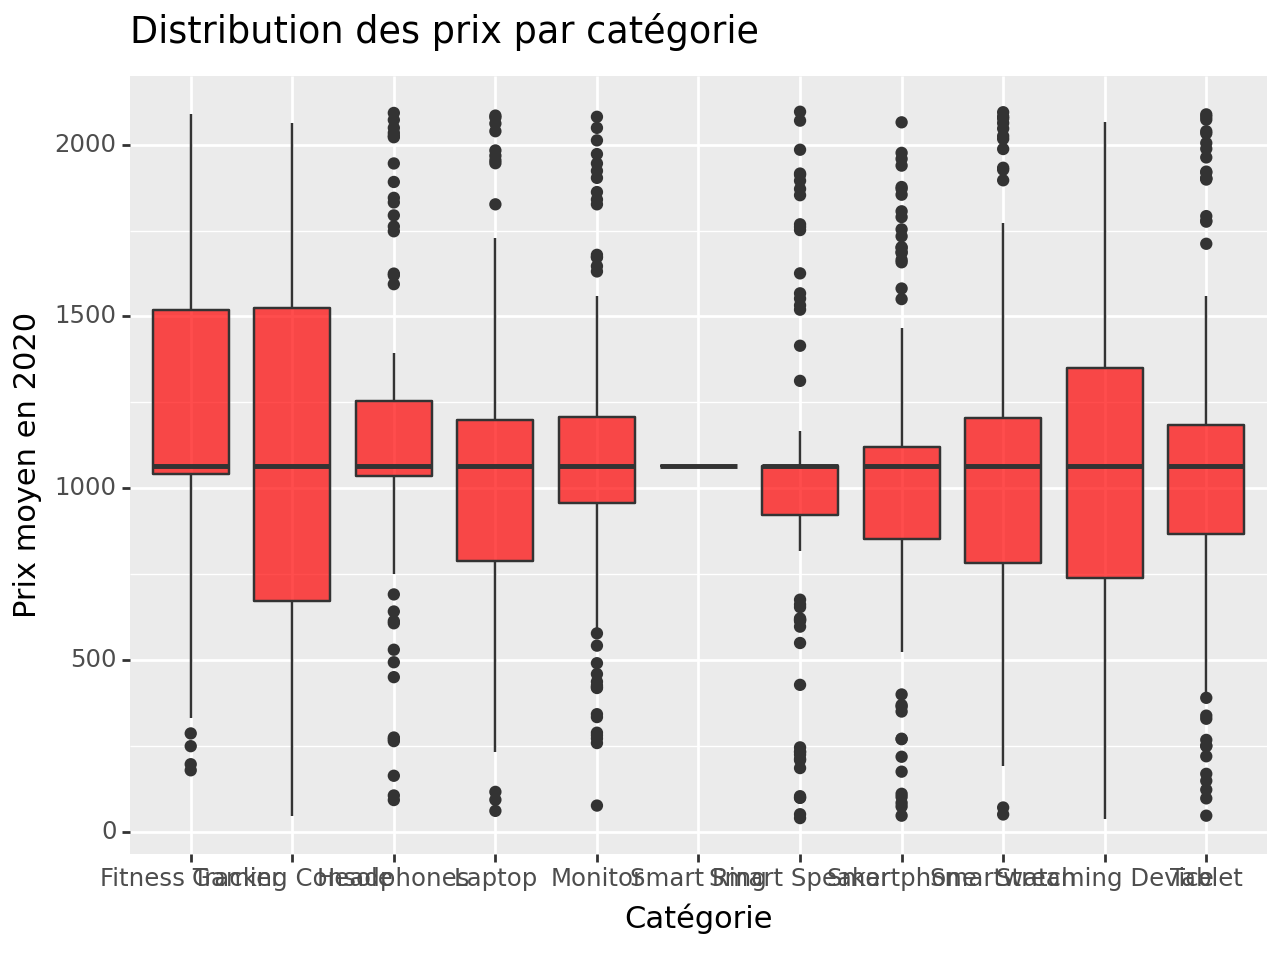

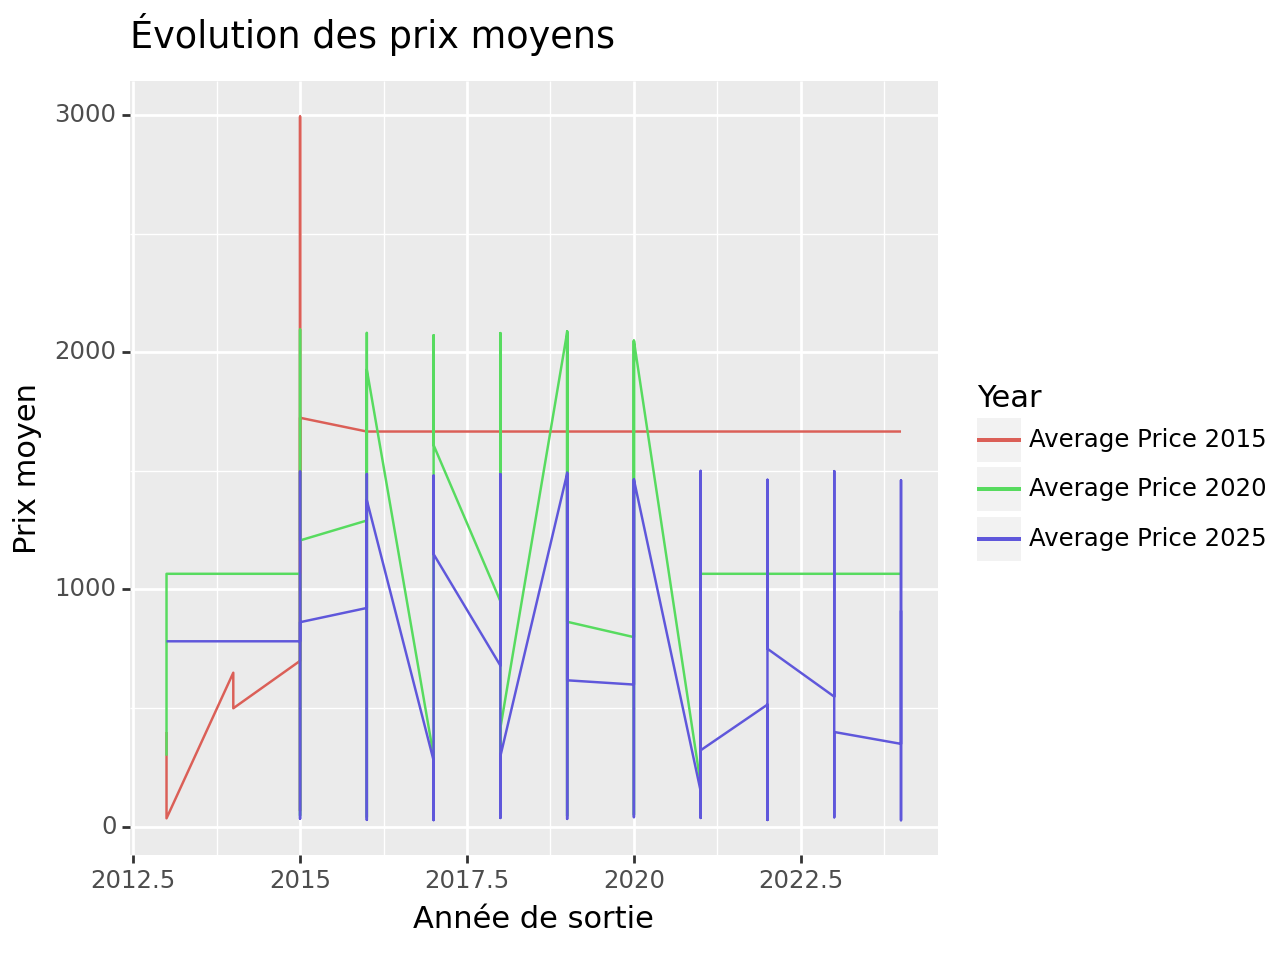

In [ ]:

from plotnine import ggplot, aes, geom_histogram, geom_boxplot, geom_line, facet_wrap, labs

# Histogramme des prix en 2020 avec Plotnine
plot1 = (
    ggplot(data, aes(x='Average Price 2020')) +
    geom_histogram(binwidth=100, fill='blue', alpha=0.7) +
    labs(title="Répartition des prix moyens en 2020", x="Prix", y="Nombre de produits")
)
print(plot1)

#Boxplot des prix par catégorie avec Plotnine
plot2 = (
    ggplot(data, aes(x='Category', y='Average Price 2020')) +
    geom_boxplot(fill='red', alpha=0.7) +
    labs(title="Distribution des prix par catégorie", x="Catégorie", y="Prix moyen en 2020")
)
print(plot2)

#Évolution des prix moyens au fil du temps avec Plotnine
data_melted = data.melt(id_vars=['Release Year'], value_vars=['Average Price 2015', 'Average Price 2020', 'Average Price 2025'], 
                         var_name='Year', value_name='Price')

plot3 = (
    ggplot(data_melted, aes(x='Release Year', y='Price', color='Year')) +
    geom_line() +
    labs(title="Évolution des prix moyens", x="Année de sortie", y="Prix moyen")
)
print(plot3)


In [ ]:
import numpy as np

# Calcul des statistiques pour Average Price 2020
mean_price = np.mean(data['Average Price 2020'])
median_price = np.median(data['Average Price 2020'])
std_dev_price = np.std(data['Average Price 2020'])
min_price = np.min(data['Average Price 2020'])
max_price = np.max(data['Average Price 2020'])

print(f"Moyenne: {mean_price:.2f}")
print(f"Médiane: {median_price:.2f}")
print(f"Écart-type: {std_dev_price:.2f}")
print(f"Prix minimum: {min_price}")
print(f"Prix maximum: {max_price}")
#calculer des mesures importantesMoyenne, médiane, écart-type des prixMinimum et maximum pour voir la plage des prix


Moyenne: 1073.94
Médiane: 1066.10
Écart-type: 476.70
Prix minimum: 38.5
Prix maximum: 2095.8


In [ ]:
from scipy.stats import shapiro

stat, p_value = shapiro(data['Average Price 2020'])
print(f"Statistique de Shapiro-Wilk: {stat:.4f}, p-value: {p_value:.4f}")

if p_value > 0.05:
    print("Les données suivent une distribution normale.")
else:
    print("Les données ne suivent PAS une distribution normale.")
#On teste si les prix moyens en 2020 suivent une distribution normale.

Statistique de Shapiro-Wilk: 0.9280, p-value: 0.0000
Les données ne suivent PAS une distribution normale.


In [ ]:
from scipy.stats import f_oneway

# Séparer les prix par catégorie
categories = data['Category'].unique()
price_groups = [data[data['Category'] == cat]['Average Price 2020'] for cat in categories]

# Test ANOVA
stat, p_value = f_oneway(*price_groups)
print(f"Statistique de test ANOVA: {stat:.4f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Il existe une différence significative entre les prix des différentes catégories.")
else:
    print("Aucune différence significative entre les catégories de produits.")
#On utilise ANOVA pour tester si la moyenne des prix varie significativement entre différentes catégories de produits.

Statistique de test ANOVA: 0.7945, p-value: 0.6342
Aucune différence significative entre les catégories de produits.


In [68]:
#Trouver les produits les plus vendus
popular_products = data['Product Name'].value_counts().head(5).index.tolist()
print("Produits populaires:", popular_products)

Produits populaires: ['Sony Tablet Model 556', 'Apple Laptop Model 289', 'Google Smart Speaker Model 323', 'Fitbit Smartphone Model 387', 'Amazon Smart Speaker Model 758']


In [69]:
import plotly.express as px

# Filtrer les produits populaires
df_popular = data[data['Product Name'].isin(popular_products)]

# Transformation des données en format long pour l'affichage
df_melted = df_popular.melt(id_vars=['Product Name', 'Release Year'],
                            value_vars=['Average Price 2015', 'Average Price 2020', 'Average Price 2025'],
                            var_name='Year', value_name='Price')

# Remettre les années sous forme d'entiers
df_melted['Year'] = df_melted['Year'].str.extract(r'(\d+)').astype(int)

# Tracer l'évolution des prix
fig = px.line(df_melted, x='Year', y='Price', color='Product Name', 
              title="Évolution des prix des produits populaires",
              markers=True)
fig.show()